In [1]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('/content/tweets.csv')
data.head

<bound method NDFrame.head of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [3]:
data.info() # 0 refers to positive sentiment, 1 is negative sentiment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [4]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
# drop the id column
data.drop(['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [6]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

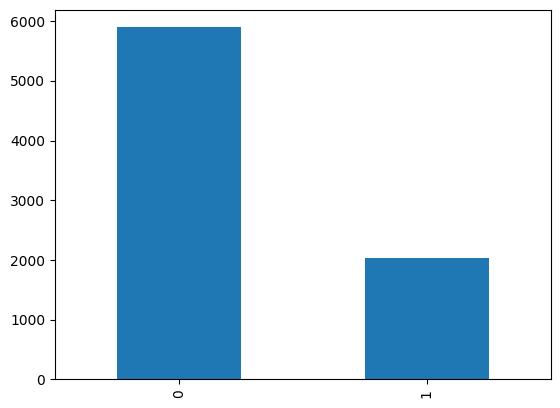

In [7]:
# plot the label counts
data['label'].value_counts().plot(kind='bar')

In [8]:
import nltk
from nltk.corpus import stopwords  #stopwords are the normal english words that are use to refer someone like they them,are etc

In [10]:
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords) #by using nltk lybrary
len(nltk_stopwords)

{"wouldn't", 'out', 'had', "shan't", 'our', 'an', "you're", 'them', 'ourselves', 'but', 'further', 'under', 'am', 'only', 'mustn', "doesn't", 'when', 'hadn', 'doing', 'did', 've', "you'd", 'ours', 'very', 'her', 'didn', 'are', "couldn't", "isn't", 'you', 'should', 'couldn', 'it', 'ma', 'hers', "won't", 'weren', 'no', "that'll", 'each', "wasn't", 'other', 'below', 'having', 'by', 'any', 'after', 'herself', 'through', 'their', 'o', 'up', 'been', 'aren', 'its', 'she', 'doesn', 'most', 'll', "she's", 'until', 'this', 'off', 'from', 'that', 'we', 're', 'again', 'has', "didn't", 'himself', 'can', 'against', 'above', 'some', 'haven', 'shouldn', 'as', 'theirs', 'y', 'do', 'themselves', 't', "don't", 'own', 'ain', 'during', 'where', 'isn', 'm', "aren't", 'to', 'into', 'all', 'd', "haven't", 'which', "needn't", 'me', 'they', 'about', 'there', 'yourselves', 'those', 'a', 'wasn', 'yourself', 'if', "it's", 'i', 'over', "you'll", 'his', 'nor', 'he', 'on', 'same', 'wouldn', 'does', 'so', 'be', 'of', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [11]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)
len(sklearn_stopwords)

{'had', 'last', 'show', 'hence', 'an', 'whereas', 'sincere', 'them', 'whose', 'almost', 'am', 'only', 'whole', 'became', 'seems', 'front', 'upon', 'ours', 'very', 'etc', 'wherever', 'her', 'are', 'perhaps', 'whereby', 'un', 'it', 'hers', 'nevertheless', 'system', 'elsewhere', 'since', 'each', 'thence', 'other', 'below', 'by', 'whenever', 'co', 'through', 'beforehand', 'their', 'sometimes', 'whereafter', 'would', 'another', 'its', 'someone', 'three', 'towards', 'anyone', 'therein', 'however', 'twenty', 'from', 'hereafter', 'that', 'we', 're', 'has', 'moreover', 'bill', 'together', 'against', 'always', 'above', 'as', 'top', 'thereafter', 'well', 'de', 'where', 'become', 'many', 'ten', 'alone', 'all', 'beside', 'whether', 'me', 'neither', 'con', 'inc', 'they', 'several', 'ever', 'done', 'a', 'if', 'indeed', 'every', 'move', 'of', 'be', 'keep', 'else', 'hereby', 'eg', 'more', 'otherwise', 'have', 'the', 'four', 'enough', 'often', 'side', 'thick', 'much', 'somehow', 'down', 'my', 'whom', 's

318

In [13]:
print(nltk_stopwords.intersection(sklearn_stopwords))
len(nltk_stopwords.intersection(sklearn_stopwords))

{'out', 'had', 'our', 'an', 'them', 'further', 'ourselves', 'but', 'under', 'am', 'only', 'when', 'ours', 'very', 'her', 'are', 'you', 'should', 'it', 'hers', 'no', 'each', 'other', 'below', 'by', 'any', 'after', 'herself', 'through', 'their', 'up', 'been', 'its', 'she', 'most', 'until', 'this', 'off', 'from', 'that', 'we', 're', 'again', 'has', 'himself', 'can', 'against', 'above', 'some', 'as', 'do', 'themselves', 'own', 'during', 'where', 'to', 'into', 'all', 'which', 'me', 'they', 'about', 'there', 'yourselves', 'those', 'a', 'yourself', 'if', 'i', 'over', 'his', 'nor', 'he', 'on', 'same', 'so', 'be', 'of', 'yours', 'too', 'how', 'than', 'at', 'more', 'what', 'have', 'the', 'itself', 'is', 'in', 'myself', 'my', 'down', 'while', 'whom', 'or', 'your', 'both', 'who', 'with', 'not', 'before', 'for', 'these', 'him', 'why', 'then', 'being', 'between', 'here', 'because', 'was', 'were', 'now', 'will', 'once', 'such', 'few', 'and'}


119

In [14]:
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)

378

In [16]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

[nltk_data] Downloading package wordnet to /root/nltk_data...


'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [18]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00


In [22]:
import contractions
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [23]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [24]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...
4,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


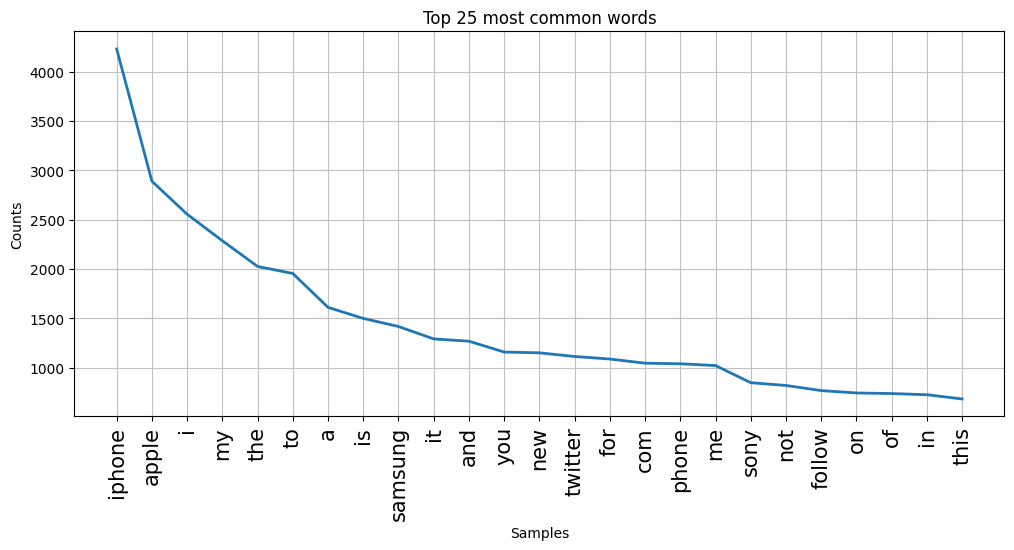

In [25]:
#data visualization of cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words))
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [39]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [26]:
data.shape

(7920, 3)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [28]:
CV_features.shape

(7920, 15955)

In [29]:
CV_features[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [30]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.size/1e6

126.3636

In [32]:
import numpy as np
np.count_nonzero(df)

114973

In [33]:
100*np.count_nonzero(df)/df.size

0.09098585352110893

In [35]:
print(CV.get_feature_names_out()[:50])
len(CV.get_feature_names_out())

['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abe' 'aber' 'abercrombie' 'abi'
 'ability' 'abit' 'able' 'ableton' 'abnqum' 'aboard' 'about' 'aboutalook'
 'aboutdamntime' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones']


15955

In [36]:
CV_features[10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [37]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

In [41]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

85.24 1.3


300

In [42]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [45]:
y.value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64